# Overview

# Business Case

# Data Understanding

## Limitations

# Objectives

# Data Collection and EDA

In [213]:
# Import relevant libraries
import pandas as pd
import os, shutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import sklearn
from sklearn.manifold import TSNE
import networkx as nx
from wordcloud import WordCloud, STOPWORDS
import random

import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
import matplotlib.pyplot as plt
import string
import re
import contractions

from collections import defaultdict
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [214]:
# Load dataset as DataFrame
# (Note: you will need a folder called "data" storing the dataset in your repo for this to work!)
df = pd.read_csv('data/train-balanced-sarcasm.csv')

In [215]:
df.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


In [216]:
df = df.rename(columns={'label' : 'target'})
df.head()
df.tail()

,target,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
1010821,1,I'm sure that Iran and N. Korea have the techn...,TwarkMain,reddit.com,2,2,0,2009-04,2009-04-25 00:47:52,"No one is calling this an engineered pathogen,..."
1010822,1,"whatever you do, don't vote green!",BCHarvey,climate,1,1,0,2009-05,2009-05-14 22:27:40,In a move typical of their recent do-nothing a...
1010823,1,Perhaps this is an atheist conspiracy to make ...,rebelcommander,atheism,1,1,0,2009-01,2009-01-11 00:22:57,Screw the Disabled--I've got to get to Church ...
1010824,1,The Slavs got their own country - it is called...,catsi,worldnews,1,1,0,2009-01,2009-01-23 21:12:49,I've always been unsettled by that. I hear a l...
1010825,1,"values, as in capitalism .. there is good mone...",frogking,politics,2,2,0,2009-01,2009-01-24 06:20:14,Why do the people who make our laws seem unabl...


In [217]:
normal_df = df[df['target'] == 0]
sarcastic_df = df[df['target'] == 1]

In [218]:
len(df)

1010826

In [219]:
def get_normal_comment(index):
    
    topic = normal_df.iloc[index].subreddit
    parent_comment = normal_df.iloc[index].parent_comment
    comment = normal_df.iloc[index].comment
    
    
    print(f'''Topic: {topic}\n \nParent Comment: {parent_comment}\n \nComment: {comment}''')

get_normal_comment(random.randint(0, len(normal_df)))

Topic: politics
 
Parent Comment: I'm beginning to think trump really hates Obama, for some unknown reason
 
Comment: Probably because he's not white.


In [220]:
def get_sarcastic_comment(index):
    
    topic = sarcastic_df.iloc[index].subreddit
    parent_comment = sarcastic_df.iloc[index].parent_comment
    comment = sarcastic_df.iloc[index].comment
    
    
    print(f'''Topic: {topic}\n \nParent Comment: {parent_comment}\n \nComment: {comment}''')

get_sarcastic_comment(random.randint(0, len(sarcastic_df)))

Topic: AskReddit
 
Parent Comment: Because stoners never get cancer
 
Comment: It's cheating because they don't live long enough to get cancer.


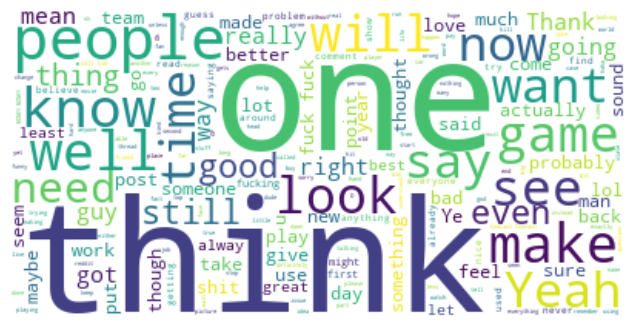

In [221]:
text_df = ' '.join([str(text) for text in normal_df['comment']])
wordcloud = WordCloud(background_color="white").generate(text_df)

# Display the generated image:
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

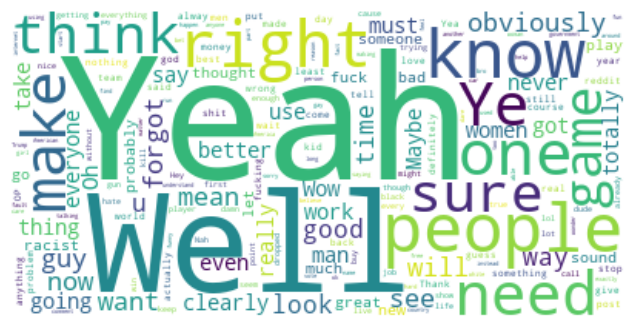

In [222]:
text_df = ' '.join([str(text) for text in sarcastic_df['comment']])
wordcloud = WordCloud(background_color="white").generate(text_df)

# Display the generated image:
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [223]:
sample_text = df.iloc[1].parent_comment
sample_text

'The blazers and Mavericks (The wests 5 and 6 seed) did not even carry a good enough record to make the playoffs in the east last year.'

In [224]:
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [225]:
split_text = sample_text.split(' ')
split_text

['The',
 'blazers',
 'and',
 'Mavericks',
 '(The',
 'wests',
 '5',
 'and',
 '6',
 'seed)',
 'did',
 'not',
 'even',
 'carry',
 'a',
 'good',
 'enough',
 'record',
 'to',
 'make',
 'the',
 'playoffs',
 'in',
 'the',
 'east',
 'last',
 'year.']

In [226]:
stopwords = set(stopwords.words('english'))
pattern = "([a-zA-Z]+(?:'[a-z]+)?|\b\d+[\w'-]*)"

In [211]:
tokenizer = RegexpTokenizer(pattern)
sample_text = tokenizer.tokenize(sample_text)
sample_text = [token.lower() for token in sample_text]
sample_text = [token for token in sample_text if token not in stopwords]

TypeError: expected string or bytes-like object

In [212]:
sample_text

['blazers',
 'mavericks',
 'wests',
 'seed',
 'even',
 'carry',
 'good',
 'enough',
 'record',
 'make',
 'playoffs',
 'east',
 'last',
 'year']

# Hypothesis Testing?

# Conclusions

## Next Steps

## Contact Information